# Medical Appointment Data Analysis
---
**Author**: Mohamed Sofiene Kadri <br>
**Date**: 18/07/2022 <br>
**email**: mohamed.sofiene.kadri@gmail.com <br>
**LinkedIn**: [mohamed-sofiene-kadri](https://www.linkedin.com/in/mohamed.sofiene.kadri) <br>
**GitHub**: [KadriSof](https://github.com/KadriSof) <br>
---

## Introduction 

The goal of this project is to explore and provide a thourough analysis of medical appointments data from the Brazilian public health system.
In this notebook we will walk through the whole process of Data Analysis using the Google Data Analytics approach for insights extraction. The process consists of 6 main phases: 

1. **ASK**: What questions do we need to answer and what's the main goal of our inquiry.
2. **PREPARE**: Prepare and provide a full description of the data.
3. **PROCESS**: Clean and fix the data.
4. **ANALYZE**: Find answers to the posed questions.
5. **SHARE**: Communicate the findings through visual representation of data.
6. **ACT**: Recommendations and solutions.


**Key Take-Away Points**:
* Respecting the order of this process is of high importance to ensure a successful analysis.
* Respecting the data ethics and the data life-cycle are important for a responsible and sustainable use of data.
* Documenting through every phase of the project helps keeping track of the process.


## Ask: Define the problem

The ask phase consists of answering a business question by a business goal using **SMART goal** approach.
During this phase, and as an analysts, our work consists of asking questions to define both the issue to be solved and what would equal a successful result. 

Our business goal for this project is:  

- **Analyze and investigate the Brazilian public health dataset to determine the five major factors that have the highest impact on patient appointment attendance between november 2015 and june 2016.**

Accordingly, the purpose of this data analysis project is to analyze the dataset variables (Gender, Age, Neighbourhood, etc.) to figure out which factors are majorly behind the patient's no showing for their medical appointment. These findings will be used afterwards to improve the attendance rate by adjusting the appointment scheduling dates in order to improve the appointment attendance rate.

## Prepare: Collect and prepare the data

The prepare phase consists of collecting, managing, and storing the data while taking in consideration security measures and successful data management practices (we will not be focusing on data management since its practices differ from one company to another).
What we will be focusing on is:
* How the data was collected or will be collected?
* Does the collected data serves our analysis goal? 
* Where to store the data and how to keep it secure?

Since we will be working with an already **collected** small dataset, there will be no need for setting a data collection and storage strategy. However, since we will work with an available dataset, we will need to verify the **data licence** and **data ROCCC** and provide a full description of the dataset.

### Data licence: 
The data used is public available on [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments) under a [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).

### Data ROCCC: 
1. **Reliable**: MEDIUM - The data was collected between the 10th of November 2015 and the 8th of June 2016 and it cannot be used to provide any prediction or thourough analysis for a later period.
2. **Original**: MEDIUM - The data was collected by the Brazilian public health system but it is publicaly provided by a third party.
3. **Comprehensive**: HIGH - The data variables are clear and understandable and information about the variables is provided by the third party.
4. **Current**: LOW - The data was collected between 2015 and 2016.
5. **Cited**: LOW - The data is not cited.

### Data Description:
- **Data format**: CSV format structured tabular data.
- **Dataset file size**: 2048 KB
- **Number of variables (columns)**: 14 
- **Number of observations (rows)**: 21515
- **List of variables**: <br>
PatientId: Identification of a patient. <br>
AppointmentID: Identification number of each appointment. <br>
Gender: Male or Female. <br>
ScheduledDay: The scheduled day of the appointment. <br>
AppointmentDay: The actual day of the appointment. <br>
Age: How old is the patient. <br>
Neighbourhood: What neighbourhood do the patient live in. <br>
Scholarship: Whether the patient is a beneficiary of the social walfare program provide by the Brazilian government. <br>
Hipertension: Have Hipertension or not. <br>
Diabetes: Have diabetes or not. <br>
Alcoholism: A victim of alcoholism or not. <br>
Handcap: Have a disability or not. <br>
SMS_received: Recieved a reminder sms or not. <br>
No-show: Did the patient show to the appointment or not. <br>


## Process: Clean, transform, and validate the data

The process phase is all about validating and cleaning the data for the goal of ensuring a neat analysis process.
Before processing the data we need to pick the tools that we will be using for this task. Since we are working on a Jupyter notebook we will be using Python with the Pandas, Numpy, and Seaborn libraries. Spreadsheet tools like Excel can be helpful in data exploration and performing certain operations like pivot tables and fast calculations. 

Data validation is of high importance since we need to verify and ensure the data integrity (accuracy, completeness, and consistency) and to establish what data wrangling operations we need to perform.

To validate the data we need to validate the data **structure**, **type**, and **range**, and see whether there are any **constraints** and **non-consistencies**. 

Consequently, our check list will be as follows:
- Check the column names.
- Check if there are wrong data types.
- Check if there are wrong data ranges.
- Check if there are missing values.
- Check if there are duplicate values.

Afterwards, data transformation operations will be carried out to prepare the data for smooth analysis.

First let's start with setting our working space, preparing our tools, and importing the dataset!

In [2]:
#First we set our working space by installing the needed libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install Seaborn

In [3]:
#Second we import the installed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we pick a plot style (optional)
sns.set_style('whitegrid')

#make sure plots are inline with the notebook
%matplotlib inline

In [4]:
#Now we load the dataset and take a sneak-peek on the loaded data
df = pd.read_csv("no-showappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [5]:
#Let's check the statistic summary of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,2.151500e+04,2.151500e+04,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000
mean,1.514828e+14,5.655370e+06,36.704750,0.088082,0.184577,0.062517,0.047039,0.020359,0.307939
std,2.615534e+14,6.310219e+04,22.264908,0.283421,0.387963,0.242099,0.211728,0.152313,0.461652
min,9.377953e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.177533e+12,5.631100e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.995543e+13,5.663916e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.448833e+13,5.699542e+06,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999350e+14,5.754966e+06,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [6]:
#Let's get more info about the variables, the observations, and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21515 entries, 0 to 21514
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       21515 non-null  float64
 1   AppointmentID   21515 non-null  int64  
 2   Gender          21515 non-null  object 
 3   ScheduledDay    21515 non-null  object 
 4   AppointmentDay  21514 non-null  object 
 5   Age             21514 non-null  float64
 6   Neighbourhood   21514 non-null  object 
 7   Scholarship     21514 non-null  float64
 8   Hipertension    21514 non-null  float64
 9   Diabetes        21514 non-null  float64
 10  Alcoholism      21514 non-null  float64
 11  Handcap         21514 non-null  float64
 12  SMS_received    21514 non-null  float64
 13  No-show         21514 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 2.3+ MB


Now let's check the data shape and data type of each column.

In [7]:
#Let's verify the data shape and columns data types
print("Data shape: ", df.shape)
pd.DataFrame(df.dtypes, columns=['data_type'])

Data shape:  (21515, 14)


,data_type
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,float64
Neighbourhood,object
Scholarship,float64
Hipertension,float64
Diabetes,float64


As we can see we have fix few columns data types that are inconsistent like:
- **PatientId**, **AppointmentID**, and **Age**: instead of float64 we can use int64. 
- **ScheduledDay** and **AppointmentDay**: data type should be datetime and not object.
- **Scholarshipn**, **Hipertension**, **Diabetes**, **Alcoholism**, **Handcap**, **SMS_received**: int64 or boolean instead of float64. <br>

but before we proceed to transforming the data and correcting the data type, we need to get rid of missing values and duplicate. So let's first check! 

In [8]:
#Check for missing values
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay     True
Age                True
Neighbourhood      True
Scholarship        True
Hipertension       True
Diabetes           True
Alcoholism         True
Handcap            True
SMS_received       True
No-show            True
dtype: bool

In [9]:
#Check the number of missing values per variable
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

As we can see we have 10 missing values in 10 columns which means that at max we will have 10 observations to drop and since we have 21515 observation in total, dropping 10 won't affect our analysis. However, we will take an extra step and verify which rows have nan values.

In [10]:
#Let's make a dataframe with the rows that have nan values and check it out
count_nan = df.isna().sum().sum()
print ('Count of NaN: ' + str(count_nan))
nan_values = df[df.isna().any(axis=1)]
nan_values.head(count_nan)

Count of NaN: 10


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
21514,7.472498e+13,5676926,F,2016-05-09T16:53:36Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hurray! we only have one row (idx: 21514) that have all the 10 missing values. Now we will drop this row and move on.

In [11]:
#Now let's drop the rows with missing values and check again
df.dropna(inplace=True)
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
#Check for duplicate values
df.duplicated().any()

False

No duplicates! We proceed now to the data transformation process and we will start by correcting the columns data type.

In [13]:
df["PatientId"] = df["PatientId"].astype(np.int64)
df["AppointmentID"] = df["AppointmentID"].astype(np.int64)

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df["AppointmentDay"])

#Here we will be choosing the np.int8 (numpy.byte) since the values are either 0 or 1
#This choice is for computational purposes
df["Age"] = df["Age"].astype(np.int8)
df["Scholarship"] = df["Scholarship"].astype(np.int8)
df["Hipertension"] = df["Hipertension"].astype(np.int8)
df["Diabetes"] = df["Diabetes"].astype(np.int8)
df["Alcoholism"] = df["Alcoholism"].astype(np.int8)
df["Handcap"] = df["Handcap"].astype(np.int8)
df["SMS_received"] = df["SMS_received"].astype(np.int8)

#Let's verify again the data shape and columns data types
print("Data shape: ", df.shape)
pd.DataFrame(df.dtypes, columns=['data_type'])

Data shape:  (21514, 14)


,data_type
PatientId,int64
AppointmentID,int64
Gender,object
ScheduledDay,"datetime64[ns, UTC]"
AppointmentDay,"datetime64[ns, UTC]"
Age,int8
Neighbourhood,object
Scholarship,int8
Hipertension,int8
Diabetes,int8


Now we will change the column names to lower case and replace all '-' with '_' and transform the 'No-show' column to 'show' column by inverting the original mapping for better concistency and clarity.

In [14]:
### Change all cloumns name to lower case and replace all - with _
df.columns=df.columns.str.lower().str.replace('-','_')
pd.DataFrame(df.columns)

,0
0,patientid
1,appointmentid
2,gender
3,scheduledday
4,appointmentday
5,age
6,neighbourhood
7,scholarship
8,hipertension
9,diabetes


In [15]:
df.no_show = df.no_show.map({'No':1,'Yes':0})
df.rename(columns={'no_show':'show'},inplace=True)
print(df.show.unique())

[1 0]


And let's create a new column that shows the days difference between the scheduled day and the appointment day and add it to our data frame.

In [16]:
day_diff=(df.appointmentday.dt.date - df.scheduledday.dt.date).dt.days 
df.insert(3,'day_diff',day_diff)
df['day_diff'] = df['day_diff'].astype(np.int8)

Let's have a final verification of the cleaned and transformed data.

In [17]:
df.head()

,patientid,appointmentid,gender,day_diff,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,5642903,F,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [18]:
df.describe()

,patientid,appointmentid,day_diff,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,2.151400e+04,2.151400e+04,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000
mean,1.514864e+14,5.655369e+06,8.895463,36.704750,0.088082,0.184577,0.062517,0.047039,0.020359,0.307939,0.799015
std,2.615590e+14,6.310348e+04,13.360183,22.264908,0.283421,0.387963,0.242099,0.211728,0.152313,0.461652,0.400746
min,9.377900e+04,5.030230e+06,-80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.177479e+12,5.631100e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.995543e+13,5.663912e+06,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.448833e+13,5.699543e+06,11.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999350e+14,5.754966e+06,115.000000,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21514 entries, 0 to 21513
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   patientid       21514 non-null  int64              
 1   appointmentid   21514 non-null  int64              
 2   gender          21514 non-null  object             
 3   day_diff        21514 non-null  int8               
 4   scheduledday    21514 non-null  datetime64[ns, UTC]
 5   appointmentday  21514 non-null  datetime64[ns, UTC]
 6   age             21514 non-null  int8               
 7   neighbourhood   21514 non-null  object             
 8   scholarship     21514 non-null  int8               
 9   hipertension    21514 non-null  int8               
 10  diabetes        21514 non-null  int8               
 11  alcoholism      21514 non-null  int8               
 12  handcap         21514 non-null  int8               
 13  sms_received    21514 non-null 

Yes! Now that we have finally finished the process of data cleaning and transformation and made sure that the data is valide, we will proceed now to the intressting part. **The Exploratory Data Analysis!**

## Analyze: Explore, visualize, and analyze the data

The analyze phase is all about finding patterns, relationships, and trends in the data. In order to dive deep into the data and extract the insights that will answer our question, we need to sort, filter, and aggregate the data and with the help of visualization tools and charts we will be able to easly derive the needed information.

We will start with basic calculation of the show ratio to see the percentage of the show / no-show and see after if we can find any correlations in the data.

In [20]:
#Let's first have a statistical summary of the show variable
n = df['show'].value_counts()
print("The count of unique values in the show column:\n", n)
df['show'].describe()

The count of unique values in the show column:
 1    17190
0     4324
Name: show, dtype: int64


count    21514.000000
mean         0.799015
std          0.400746
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: show, dtype: float64

In [21]:
#We define a plot_ratio function to plot the show percentage in relation to other variables
def plot_ratio(x):
    df.groupby(x).show.mean().plot(kind='bar',edgecolor='black').set_ylabel('Ratio of show');
    display(df.groupby(x)[['show']].mean())
    plt.legend()

Let's see the percentage of patients who did not show for their appointment and those who did.

The percentage of patients who didn't show up for their appointment is 20.1 %


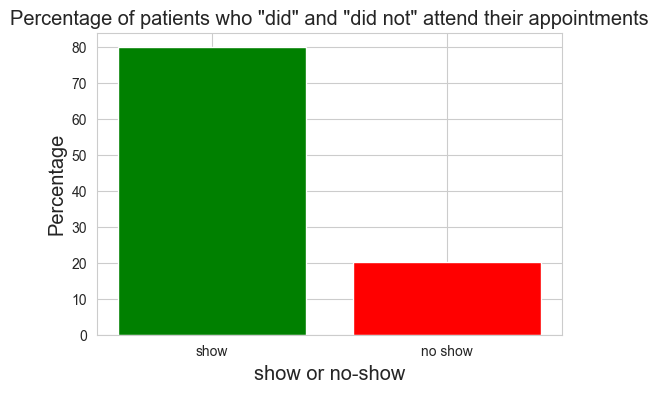

In [22]:
# percentage of show and no show
print(f"The percentage of patients who didn't show up for their appointment is { round((1-df.show.mean())*100, 2) } %" )

no_show_ratio = len(df[df.show==0]) / len(df.show)
show_ratio = len(df[df.show==1]) / len(df.show)

plt.figure(figsize=(6,4), dpi=100)
plt.bar(['show','no show'], [show_ratio*100, no_show_ratio*100], color=['g','r']);
plt.title('Percentage of patients who "did" and "did not" attend their appointments', fontsize='x-large');
plt.ylabel('Percentage', fontsize='x-large');
plt.xlabel('show or no-show', fontsize='x-large');
#display(df.groupby('show')[['show']].count())

Let's try a pie chart! 

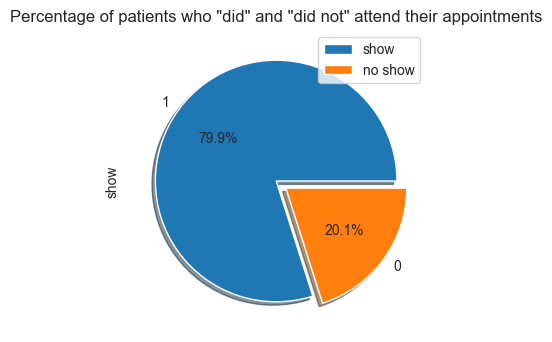

In [23]:
plt.figure(figsize=(6,4), dpi=100)

df.show.value_counts().plot(kind="pie",
                            title='Percentage of patients who "did" and "did not" attend their appointments',
                            shadow=True,
                            autopct='%1.1f%%',
                            explode=(0, 0.1),
                            legend=True).legend(["show", "no show"])

#### a) Gender
Now let's dig deep and find which factors (variables) have a high impact (correlation) on the "showing" and "not showing" of partient to their appointments. So first let's check the percentage of "show" / "no_show" by gender.

In [24]:
#We will filter the data using a boolean mask 
show_msq = (df.show == 1) #boolean masking
no_show_msq = (df.show == 0) #boolean masking
total_miss = len(df[no_show_msq])

total = len(df)

In [25]:
#get the number of patients missing their appointments by gender
no_show_gender = df[no_show_msq]['gender'].value_counts()
show_gender = df[show_msq]['gender'].value_counts()

In [26]:
#no_show_gender

In [27]:
#show_gender

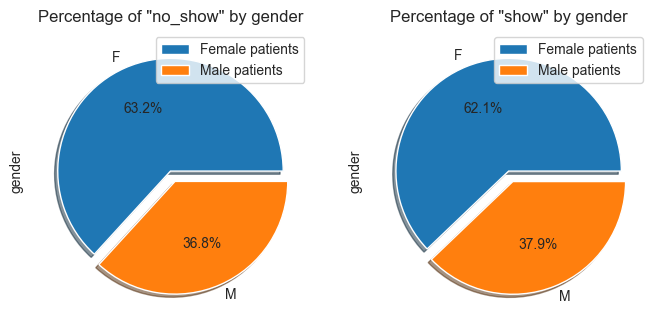

In [28]:
fig1 = plt.figure(figsize=(8,6), dpi=100)
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

no_show_gender.plot(kind='pie',
                    title='Percentage of "no_show" by gender',
                    shadow=True,
                    autopct='%1.1f%%',
                    explode=(0, 0.1),
                    legend=True,
                    ax=ax1).legend(["Female patients", "Male patients"])

show_gender.plot(kind='pie',
                    title='Percentage of "show" by gender',
                    shadow=True,
                    autopct='%1.1f%%',
                    explode=(0, 0.1),
                    legend=True,
                    ax=ax2).legend(["Female patients", "Male patients"])


plt.show()

Let's try a bar plot.

Text(0.5, 1.0, 'number of patients who did and did not show by gender')

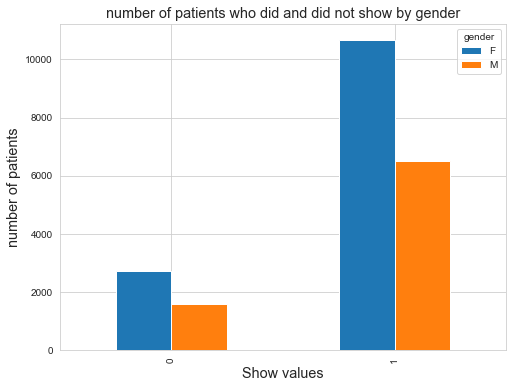

In [29]:
grp1 = df.groupby(['gender','show']).size().unstack('gender')
grp1.plot(kind='bar', figsize=(8,6))
plt.xlabel('Show values', fontsize='x-large')
plt.ylabel('number of patients', fontsize='x-large')
plt.title('number of patients who did and did not show by gender', fontsize='x-large')

So since the percenetage of female patients who did not attend their appointments are noticeably higher than the male patients, can we assume that female patients are more likely to miss their appointments than male patients?

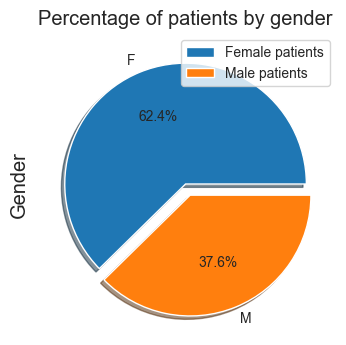

In [30]:
plt.figure(figsize=(6,4), dpi=100)
df.gender.value_counts(normalize=True).plot(kind='pie',
                                            shadow=True,
                                            autopct='%1.1f%%',
                                            explode=(0, 0.1),
                                            legend=True).legend(["Female patients", "Male patients"])

plt.title('Percentage of patients by gender', fontsize='x-large')
plt.ylabel('Gender', fontsize='x-large')
plt.show()

**=> As we can see this constatation is quite not right since the percentage of female patients are larger than male patients.**

#### b) Scholarship 
Now let's check whether the patients with a scholarship(§) are more likely to miss their appointment or not. <br>
*(§): **Bolsa Família**:  social welfare program of the Government of Brazil.*

,show
scholarship,
0,0.803252
1,0.755145


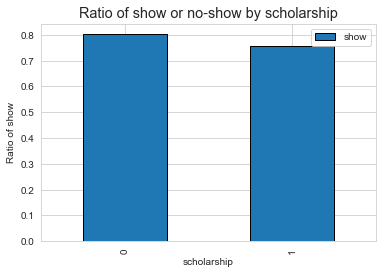

In [31]:
#what is the percentage of patients missing their appointment by scholarship
plot_ratio("scholarship")
plt.title('Ratio of show or no-show by scholarship', fontsize='x-large');
#df.groupby('scholarship')[['show']].mean()

Text(0.5, 1.0, 'number of patients with and without scholarship')

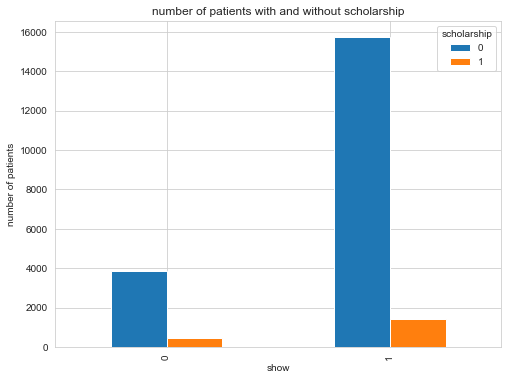

In [32]:
grp2 = df.groupby(['show','scholarship']).size().unstack('scholarship')
fig4 = grp2.plot(kind='bar', figsize=(8,6))
fig4.set_ylabel('number of patients')
fig4.set_title('number of patients with and without scholarship')

Basing on the second figure we notice that the number of patients with scholarships are highly larger than those who are not. And from the first figure we can also notice that having a scholarship slightly imapcts the attendance rate. <br>

**=> Consequently, we can conclude that the patients enrolled in the welfare program may, more or less, impact the attendance rate.**

#### c) SMS received
Next, let's check whether the patients who recieved an sms were more likely to show to their appointments or not.

,show
sms_received,
0,0.833837
1,0.720755


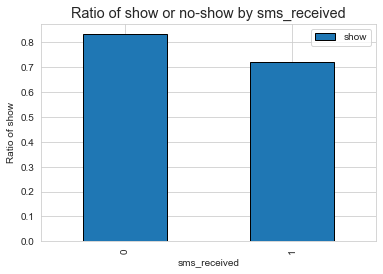

In [33]:
#The percentage of patient who attended their appointment by sms_received
plot_ratio(df.sms_received)
plt.title('Ratio of show or no-show by sms_received', fontsize='x-large');

Weirdly, here we notice that the percentage of patients who recieved an sms reminder of their appointments is lower than the patients who did not. Consequently, this finding, although proven by our analysis, is incoherent as the sms reminder service is employed for the goal of increasing the attendance rate. <br>
In this case, when encountering and inconsistant finding through the analysis, the analyst may either resort to digging into more data to validate the constatation or consult specific studies and articles about the imapct of sms reminder service on the attendance rate of patients in other sources.

#### d) Time difference between the scheduling day and appointment day
Next, let's take one step further into the analysis and verify whether time difference between the scheduling day and appointment day have an impact on the patients attendance rate

In [34]:
#filter for positive day difference
df1 = df[df.day_diff>=0]
#df1.day_diff.unique()

the propotion of different time difference for patients who missed their appiontments:


,day_diff2
after 10 days,43.455134
after 3 days,31.012951
in 3 days,19.264570
sameday,6.267345


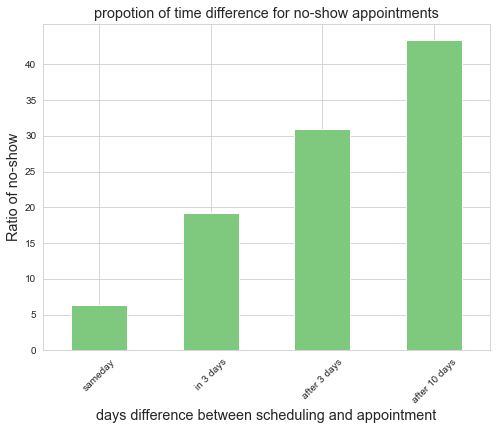

In [38]:
#turn day diff into categorical column Day_diff2
bin_edges = [-1, 0 , 3, 10, 179]

names = ['sameday', 'in 3 days', 'after 3 days', 'after 10 days']

#We use .cut to segment and sort data values into bins
df['day_diff2'] = pd.cut(df1.day_diff, bin_edges, labels=names)
#filter for no-show records and count values for each category of day_diff2

no_show_day_diff = df[no_show_msq].day_diff2.value_counts() / len(df[no_show_msq]) * 100
no_show_day_diff.reindex(names).plot(kind='bar', figsize=(8,6), colormap='Accent', rot=45);

plt.title('propotion of time difference for no-show appointments', fontsize='x-large');
plt.xlabel('days difference between scheduling and appointment', fontsize='x-large',);
plt.ylabel('Ratio of no-show', fontsize='x-large');
plt.yticks(np.arange(0, 45, step=5))


print('the propotion of different time difference for patients who missed their appiontments:')
pd.DataFrame(no_show_day_diff)

Obviously here we can notice that the percentage of no show highly increases for the appointments scheduled after 3 days of the scheduling day. Consequently, to ensure a high appointment attendance rate, the appointments should be scheduled no later than a 3 days.

#### d) Age
How about the patients age? Does the age affects the show/no show rate? <br>
Let's check it out.

,age
count,4324.000000
mean,33.114246
std,21.167986
min,0.000000
25%,16.000000
50%,32.000000
75%,49.000000
max,98.000000


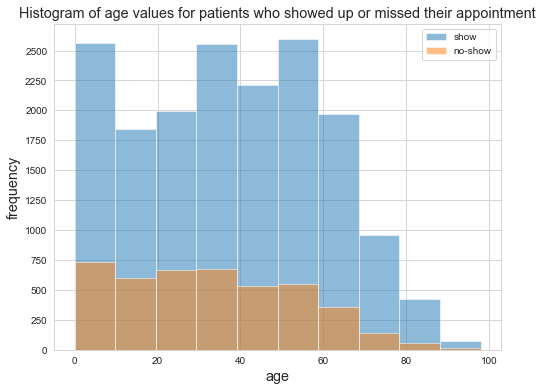

In [159]:
#plot the histograns of age for patients who showed up and who didn't
df[show_msq].age.hist(alpha=0.5, label='show',stacked=True, figsize=(8,6))
df[no_show_msq].age.hist(alpha=0.5, label='no-show',stacked=True, figsize=(8,6))

plt.legend()
plt.xlabel('age', fontsize='x-large')
plt.ylabel('frequency', fontsize='x-large')
plt.yticks(np.arange(0, 2750, step=250))
plt.title('Histogram of age values for patients who showed up or missed their appointment', fontsize='x-large')

#a statistical summary of the age variable
df[no_show_msq][['age']].describe()

There is no evidence for whether the age impacts the attendance ratio. We can only notice that the patients between the age of 20 and 40 tend to slightly miss their appointments.

In [160]:
#get the number of records for each neighbourhood
rec_neigh = df['neighbourhood'].value_counts()

#get the number of records for patients missing their appointments for each neighbourhood
rec_neigh_no_show = df[no_show_msq].neighbourhood.value_counts()

#percentage of patients missing their appointments for every neighbourhood
rec_neigh_no_show_percentage = rec_neigh_no_show / rec_neigh
pd.DataFrame(rec_neigh_no_show_percentage.sort_values(axis=0, ascending=False))

,neighbourhood
MORADA DE CAMBURI,0.333333
SANTOS DUMONT,0.327586
SANTA HELENA,0.305556
ANTÔNIO HONÓRIO,0.300000
ILHA DO PRÍNCIPE,0.298289
...,...
SANTA MARTHA,0.118694
JABOUR,0.105263
MÁRIO CYPRESTE,0.073770
ILHA DO FRADE,NaN


In [161]:
rec_neigh_no_show = pd.DataFrame(rec_neigh_no_show_percentage[0:10], columns=['neighbourhood', 'percentage'])
rec_neigh_no_show.head()


,neighbourhood,percentage
ANDORINHAS,0.267296,NaN
ANTÔNIO HONÓRIO,0.300000,NaN
ARIOVALDO FAVALESSA,0.205882,NaN
BARRO VERMELHO,0.274510,NaN
BELA VISTA,0.213675,NaN


In [162]:
rec_neigh_no_show['percentage'] = rec_neigh_no_show['neighbourhood']
rec_neigh_no_show['neighbourhood'] = rec_neigh_no_show.index
rec_neigh_no_show.sort_values(by=['percentage'], ascending=False, inplace=True)
rec_neigh_no_show.reset_index(drop=True, inplace=True)
rec_neigh_no_show.head()

,neighbourhood,percentage
0,ANTÔNIO HONÓRIO,0.300000
1,BARRO VERMELHO,0.274510
2,ANDORINHAS,0.267296
3,BENTO FERREIRA,0.215909
4,BELA VISTA,0.213675


In [163]:
rest = rec_neigh_no_show.iloc[10:]
rest.sum()

neighbourhood    0.0
percentage       0.0
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ANTÔNIO HONÓRIO'),
  Text(1, 0, 'BARRO VERMELHO'),
  Text(2, 0, 'ANDORINHAS'),
  Text(3, 0, 'BENTO FERREIRA'),
  Text(4, 0, 'BELA VISTA'),
  Text(5, 0, 'CARATOÍRA'),
  Text(6, 0, 'ARIOVALDO FAVALESSA'),
  Text(7, 0, 'BOA VISTA'),
  Text(8, 0, 'BONFIM'),
  Text(9, 0, 'CENTRO')])

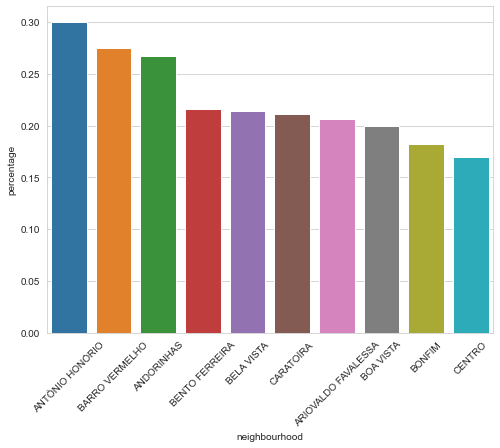

In [164]:
plt.figure(figsize=(8,6))
sns.barplot(x='neighbourhood', y='percentage', data=rec_neigh_no_show)
plt.xticks(rotation=45)

Here we selected the top 10 neighborhoods with the highest no show rate and we notice that in the top 3 ranks we have "Antonio Honorio", "Barro Vermelho", and "Andorinhas" and consequently we can conclude that these neighborhoods are either at a very long distance from the clinic or that there is no transporation line connecting these places with the clinic.

## Conclusion

Finally, and a after a thorough analysis of the Medical Appointment Data, we successfully found the insights that we can use to elaborate recommendations and even an entire action plan to improve the attendance rate of the patients. Either by optimizing the sms reminder service, schedule appointments in the first 4 days, or reach out to public transporation service to provide adequate transportation. 

The combination of analytical thinking technical mastery of analysis tools can turn data into usefull insights and drive solution for unasked questions.